# SQL Joining Tables

A join is an SQL operation performed to establish a connection between two or more database tables based on matching columns, thereby creating a relationship between the tables. Most complex queries in an SQL database management system involve join commands.

Table joining operations based on key values e.g. `ID`.



## 4.1 Inner

**Inner joins only include records in which the key is in both tables.** The operation looks from matches in the right table corresponding to entries in the key field in the left table.

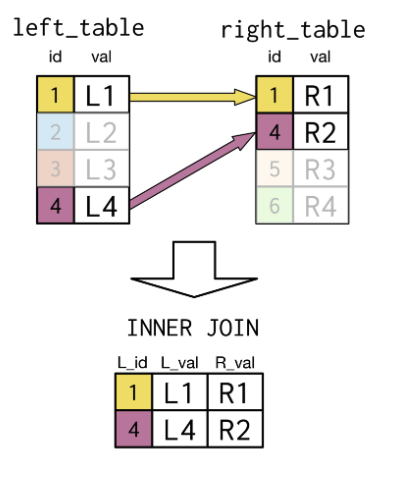\
*source: datacamp*

```sql
-- Syntax
SELECT *
FROM left_table
  INNER JOIN right_table
    ON left_table.id = right_table.id;
```

You can make use of aliasing to avoid writing long queries with column fields included `customers.age AS age` and `banks.score AS credit_score`. 

```sql
-- Select fields with aliases
SELECT c.code AS customer_code, b.credit_score, b.year, c.name
FROM customers AS c
  -- Join to banks (alias b)
  INNER JOIN bank AS b
    -- Match on code
    ON c.id = e.id;
```
> 💡 Note the left table is called in the `FROM` clause while the right table after the `JOIN` clause.*




### 4.1.1 Multiple Joins
You can combine multiple joins i a single query:
```sql
SELECT *
-- Syntax
FROM left_table
  INNER JOIN right_table
    ON left_table.id = right_table.id
  INNER JOIN another_table
    ON left_table.id = another_table.id;
```
It is standard practice to alias each table using the first letter of its name (e.g. countries AS c) as it becomes tedious to continually write long table names in joins. It is acceptable to follow this protocol. For example:
```sql
-- Select fields
SELECT c.country_code, c.name, c.region,
       p.fertility_rate, p.year,
       b.unemployment_rate
  -- Customers (alias as c)
  FROM customers AS c
  -- Join with populations (as p)
  INNER JOIN populations AS p
    -- Match on country code
    ON c.country_code = p.code
  INNER JOIN banks AS b
  -- Match on country code
  ON c.code = b.code
```

If more than one fields are common across two or more tables, then these should be included in the `JOIN` clause in order to avoid duplicate values. For example, if both the `banks` and `population` tables include a `year` field, then the query should be modified to include an `AND b.year = p.year`:
```sql
-- Select fields
SELECT c.country_code, c.name, c.region,
       p.fertility_rate, p.year,
       b.unemployment_rate
  -- Customers (alias as c)
  FROM customers AS c
  -- Join with populations (as p)
  INNER JOIN populations AS p
    -- Match on country code
    ON c.country_code = p.code
  INNER JOIN banks AS b
  -- Match on country code
    ON c.code = b.code
      AND b.year = p.year;
```
> 💡 In the `SELECT` clause, you only need to specify a field with re spect to its table (`c.order`) only when that field is not unique amongsth all tables, e.g. if order is unique to customers table `SELECT order, ...` would also work. 

### 4.1.2 INNER `JOIN` via `USING`



`USING` is a shortcut to replace `ON` for when two tables are joined on a common field name, e.g.
```sql
SELECT *
FROM countries
  INNER JOIN economies
    ON countries.code = economies.code
```
you can use `USING` as a shortcut:
```sql
SELECT *
FROM countries
  INNER JOIN economies
    USING(code);
```

### 4.1.3 Self-join

A self join is a regular join, but the table is joined with itself where different table aliases are used for the same table. Generally,  **a self-join is used when a table references data in itself** (Figure).

For example, an employee can be a boss at the same time under the same id. In the table below we can see how Nico is an employee to the company he works for, but also boss to George and Maria.



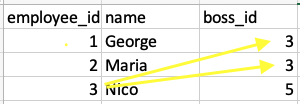

```sql
select a.employee as employee, b.employee as boss
from emp_table a, emp_table b
where a.boss_id = b.employee_id
order by 1
-- source: https://stackoverflow.com/a/3362068
```

**Coding Problem 1 (MAMMAA Tech Screening):**

`instagram.db`

| id | country | year | pings |
|----|---------|------|-------|
| 1  | USA     | 2010 | 500   |
| 2  | USA     | 2015 | 15000 |
| 3  | GR      | 2010 | 200   |
| 4  | GR      | 2015 | 100   |
| 5  | UK      | 2010 | 350   |
| 6  | UK      | 2015 | 400   |

>❓Using the table above, which country had the largest drop in pings between in the recent years?

```sql
select i1.country as country,
       i1.pings as ping2010,
       i2,pings as ping2015
from instagram as i1
    inner join instagram as i2
    on i1.country = i2.country
    where i1.year < i2.year;
>>>
| country | ping2010 | ping2015 |
|---------|----------|----------|
| USA     | 500      | 1500     |
| GR      | 200      | 180      |
| UK      | 350      | 400      |
```
Notice that, had we not used the where filter we would get duplicates for each available permutation of the self-join. 

>❓Using the table above, which country had the largest percentage drop in pings between in the last five years?

```sql
select i1.country as country,
       i1.pings as ping2010,
       i2.pings as ping2015,
       ((i2.pings - i1.pings)/i1.pings) * 100 as perc_change
from instagram as i1
    inner join instagram as i2
    on i1.country = i2.country
    where i1.year = i2.year - 5;
>>>
| country | ping2010 | ping2015 | perc_change |
|---------|----------|----------|-------------|
| USA     | 500      | 1500     | 200         |
| GR      | 200      | 100      | -100        |
| UK      | 350      | 400      | 14.2857143  |
```

### 4.1.4 Case when and then

The `CASE` expression goes through conditions and returns a value when the first condition is met (like an if-then-else statement). So, once a condition is true, it will stop reading and return the result. If no conditions are true, it returns the value in the `ELSE` clause. If there is no ELSE part and no conditions are true, it returns `NULL`.

```sql
-- Syntax
CASE
    WHEN condition1 THEN result1
    WHEN condition2 THEN result2
    -- ...
    WHEN conditionN THEN resultN
    ELSE result
END;
```
This clause is useful for looking at a numerical field not as raw data, but instead as being in different categories or groups. You can use `CASE` with `WHEN`, `THEN`, `ELSE`, and `END` to define a new grouping field.

For example, nn the "Problem 1" if we wanted to create a new categorical field based on percentage change we could do:
```sql
select i1.country as country,
       i1.pings as ping2010,
       i2.pings as ping2015,
       case 
          when ((i2.pings - i1.pings)/i1.pings) * 100 >= 30 then 'increase'
          when ((i2.pings - i1.pings)/i1.pings) * 100 <= -30 then 'decrease'
          else 'no_change'
       end
        as change
from instagram as i1
    inner join instagram as i2
    on i1.country = i2.country
    where i1.year = i2.year - 5;
>>>
| country | ping2010 | ping2015 |  change  |
|---------|----------|----------|----------|
| USA     | 500      | 1500     | increase |
| GR      | 200      | 100      | decrease |
| UK      | 350      | 400      | no_change|
```


### 4.1.5 Select Into statement

The SELECT INTO statement copies data from one table into a new table.

```sql
-- Syntax
SELECT column1, column2, column3, --...
INTO newtable [IN externaldb]
FROM oldtable
WHERE condition;
```

As an example, we could save the result of our query above to a new table by adding an into statement to the query:
```sql
select i1.country as country,
       case 
          when ((i2.pings - i1.pings)/i1.pings) * 100 >= 30 then 'increase'
          when ((i2.pings - i1.pings)/i1.pings) * 100 <= -30 then 'decrease'
          else 'no_change'
       end
        as change
into instagram_change
from instagram as i1
    inner join instagram as i2
    on i1.country = i2.country
    where i1.year = i2.year - 5;

select *
from instagram_change;
>>>
| country | change    |
|---------|-----------|
| USA     | increase  |
| GR      | decrease  |
| UK      | no_change |
```

## 4.2 Left and Right Joins

The `LEFT JOIN` keyword returns all records from the left table (table1), and the matching records from the right table (table2). The result is 0 records from the right side, if there is no match.
```sql
-- Syntax
SELECT column_name(s)
FROM table1
LEFT JOIN table2
ON table1.column_name = table2.column_name;
```
Note: In some databases `LEFT JOIN` is called `LEFT OUTER JOIN`.




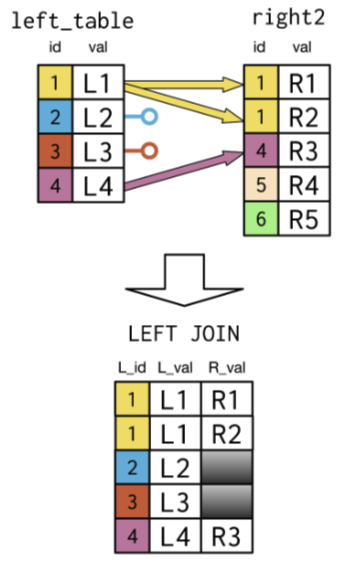\
*source: datacamp*


The `RIGHT JOIN` keyword returns all records from the right table (table2), and the matching records from the left table (table1). The result is 0 records from the left side, if there is no match. Right joins are much less frequent to use.

```sql
-- Syntax
SELECT column_name(s)
FROM table1
RIGHT JOIN table2
ON table1.column_name = table2.column_name;
```
Note: In some databases `RIGHT/LEFT JOIN` is called `RIGHT/LEFT OUTER JOIN`.

### 4.2.1 Full Joins 

The `FULL OUTER JOIN` keyword returns all records when there is a match in left (table1) or right (table2) table records.

```sql
-- Syntax
SELECT column_name(s)
FROM table1
  FULL OUTER JOIN table2
  ON table1.column_name = table2.column_name;
```

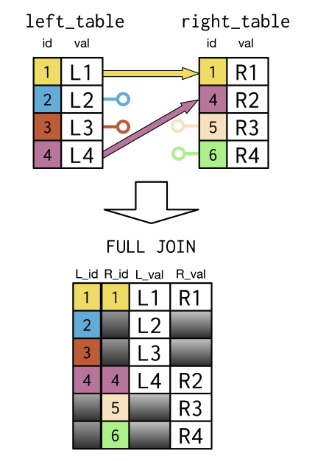

*source: datacamp*

As a general rule:

$n_{full\_join} \geq n_{left\_join} \geq n_{inner\_join} $


```sql
-- Example of joining three tables
select c1.name as country, region,
       l.name as language,
       basic_unit, frac_unit
from countries as c1 
    full join languages as l 
      using(code)
    full join currencies as c2
      using(code)
where c1.region in ('Melanesia', 'Micronesia');
```

### 4.2.2 Cross joins

The `CROSS JOIN` keyword returns all records from both tables (table1 and table2).

```sql
-- Syntax
SELECT column_name(s)
FROM table1
CROSS JOIN table2;
```




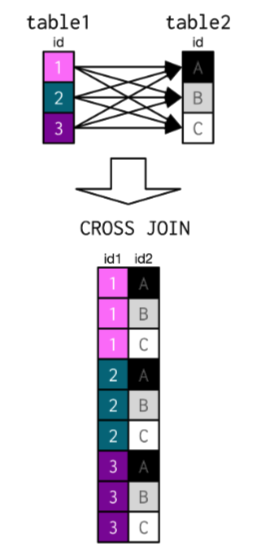